<a href="https://colab.research.google.com/github/Arsen1y-dev/Summer-Practice/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3_2_%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 3.2 Модуль pandas

Вам дан фрагмент базы данных, содержащий информацию о продажах туров в различные города России.
База данных состоит из трёх таблиц в формате csv с разделителем "точка с запятой".

Файл travel_agents.csv содержит информацию о туроператорах.
Заголовок таблицы имеет следующий вид: ID туроператора;Название;Адрес

Файл travels.csv содержит информацию об основных характеристиках каждого тура.
Заголовок таблицы имеет следующий вид: ID тура;Город;Продолжительность, дней;Стоимость, на 1 чел

Файл sale_of_tour_packages.csv содержит информацию о проданных турах за первый квартал 2022 года.
Заголовок таблицы имеет следующий вид: ID операции;Дата;ID тура;ID туроператора;Количество проданных путёвок;

На рисунке ниже приведена схема указанной базы данных:

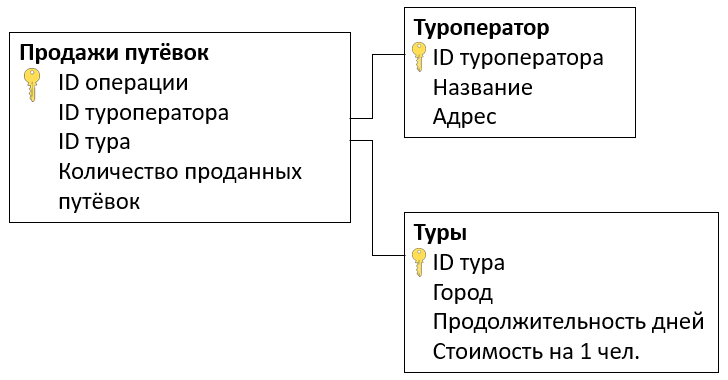


Пользуясь информацией из приведённой базы данных выполните следующие задания:

Вариант 28.

Найти название и адрес самого популярного туроператора (продавшего максимальное количество путёвок).
Построить круговую диаграмму, отображающую общую стоимость путёвок и стоимость путёвок по каждому городу, которые были проданы туроператором "Мечта".
Построить гистограмму, показывающую градацию туров по длительности путешествия.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
travel_agents = pd.read_csv('/content/drive/MyDrive/Файлы для pandas/travel_agents.csv', sep=';')
travels = pd.read_csv('/content/drive/MyDrive/Файлы для pandas/travels.csv', sep=';')
sale_of_tour_packages = pd.read_csv('/content/drive/MyDrive/Файлы для pandas/sale_of_tour_packages.csv', sep=';')

In [ ]:
sales_merged = pd.merge(sale_of_tour_packages, travels, on='ID тура')
sales_merged = pd.merge(sales_merged, travel_agents, on='ID туроператора')

Найти название и адрес самого популярного туроператора (продавшего максимальное количество путёвок).

In [ ]:
top_agent = sales_merged.groupby('ID туроператора')['Количество проданных путёвок'].sum().idxmax()
top_agent_name = travel_agents.loc[travel_agents['ID туроператора'] == top_agent, 'Название'].iloc[0]
top_agent_address = travel_agents.loc[travel_agents['ID туроператора'] == top_agent, 'Адрес'].iloc[0]
print(f"Самый популярный туроператор: {top_agent_name}\nАдрес: {top_agent_address}")

Самый популярный туроператор: Даль
Адрес: Ясная ул, 2


Построить круговую диаграмму, отображающую общую стоимость путёвок и стоимость путёвок по каждому городу, которые были проданы туроператором "Мечта".

In [ ]:
dream_sales = sales_merged[sales_merged['Название'] == 'Мечта']
dream_total_cost = dream_sales['Стоимость, на 1 чел'].sum() * dream_sales['Количество проданных путёвок'].sum()
dream_city_cost = dream_sales.groupby('Город')['Стоимость, на 1 чел'].sum() * dream_sales.groupby('Город')['Количество проданных путёвок'].sum()

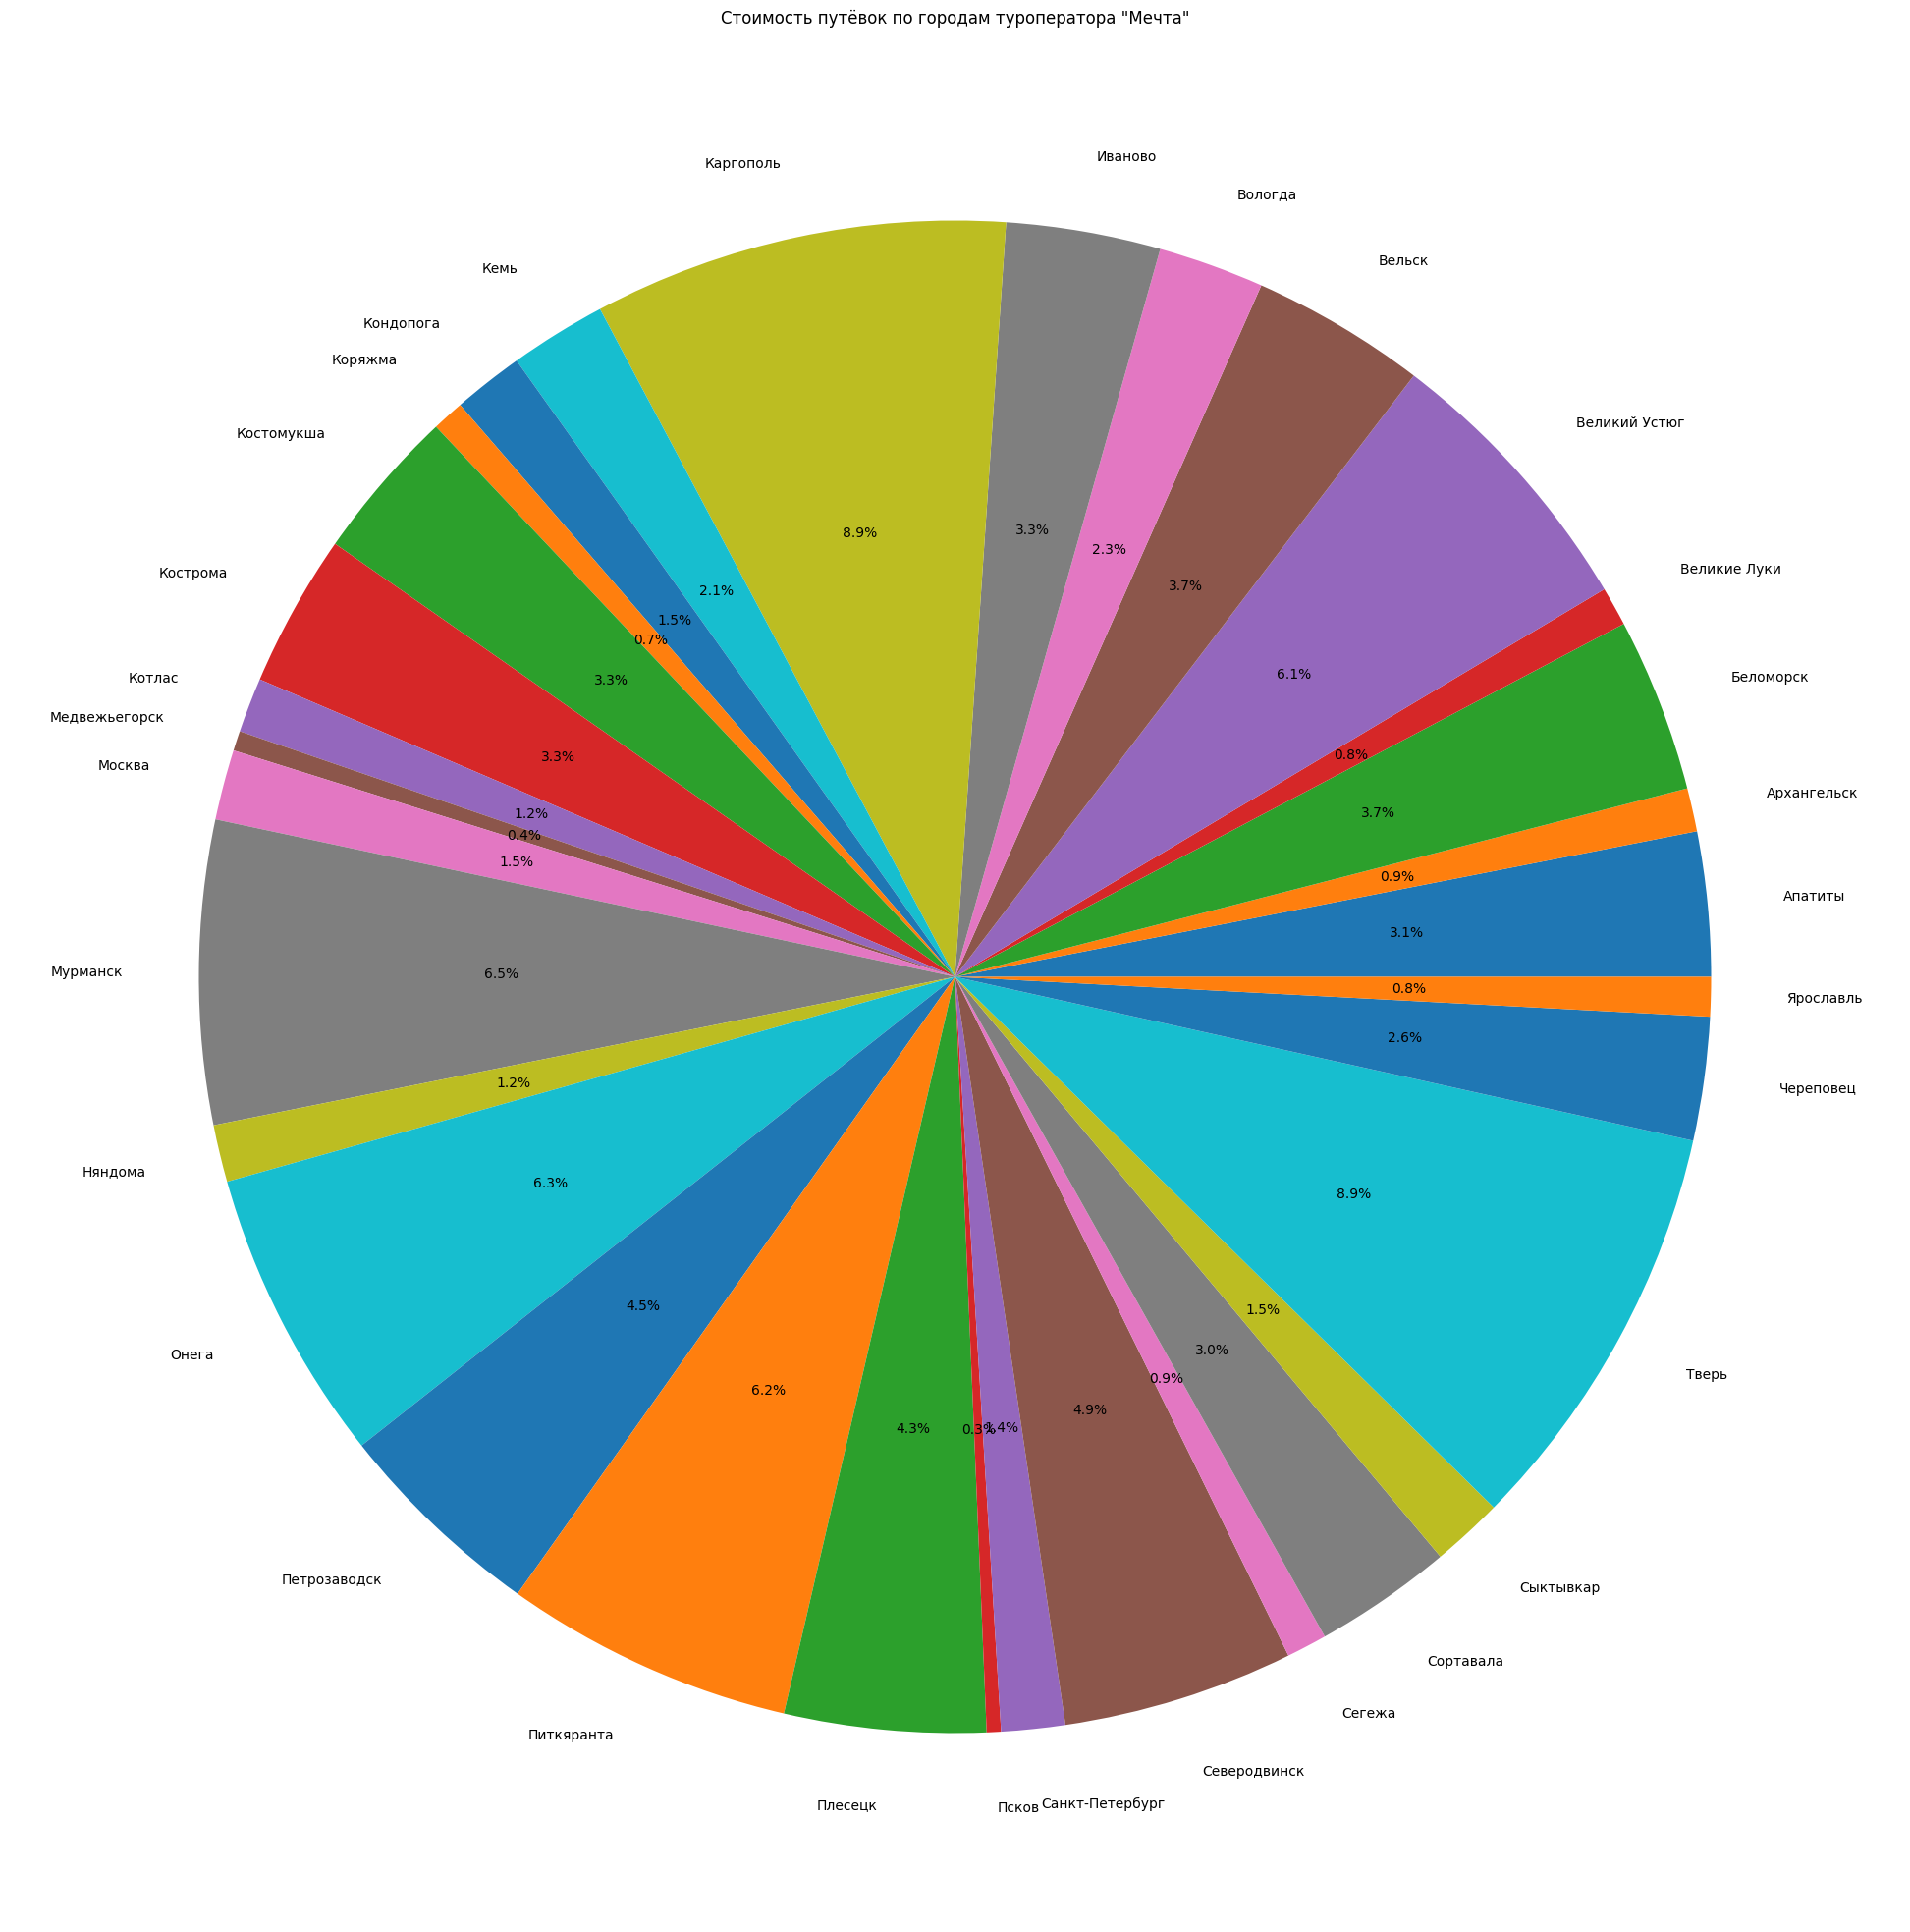

In [ ]:
import matplotlib.pyplot as plt
dream_city_cost = dream_sales.groupby('Город')['Стоимость, на 1 чел'].sum() * dream_sales.groupby('Город')['Количество проданных путёвок'].sum()
dream_city_cost_percent = dream_city_cost / dream_total_cost * 100
plt.figure(figsize=(25,25))
plt.pie(dream_city_cost_percent, labels=dream_city_cost_percent.index, autopct='%1.1f%%')
plt.title('Стоимость путёвок по городам туроператора "Мечта"')
plt.show()


Построить гистограмму, показывающую градацию туров по длительности путешествия.

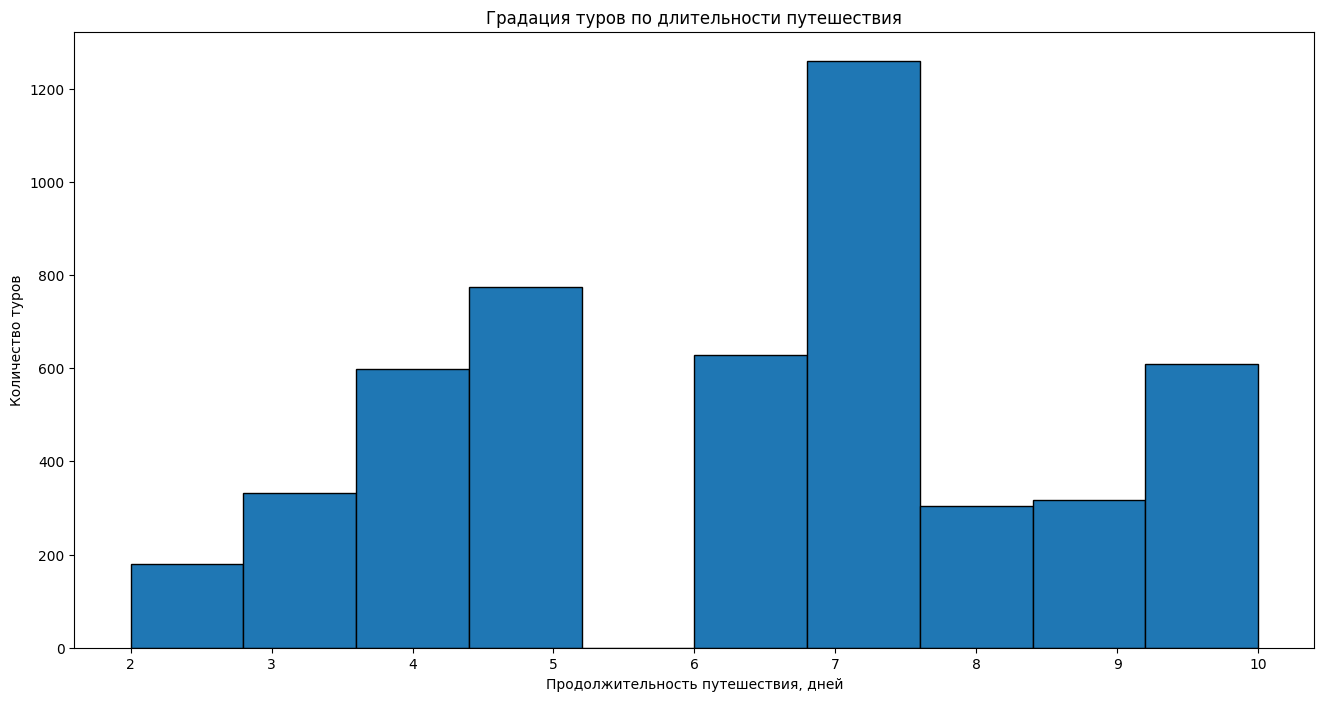

In [ ]:
plt.figure(figsize=(16, 8))
plt.hist(sales_merged['Продолжительность, дней'], bins=10, edgecolor='black')
plt.xlabel('Продолжительность путешествия, дней')
plt.ylabel('Количество туров')
plt.title('Градация туров по длительности путешествия')
plt.show()